In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [23]:
# Parse the LAMMPS output file
data = []
with open('Si.out', 'r') as f:
    reading_data = False
    for line in f:
        if 'Step' in line and 'Volume' in line:
            reading_data = True
            continue
        if reading_data:
            if line.startswith('Loop time'):
                break
            parts = line.split()
            if len(parts) == 7 and parts[0].isdigit():
                data.append([float(x) for x in parts])

# Create DataFrame
df = pd.DataFrame(data, columns=['Step', 'Volume', 'Press', 'Temp', 'PotEng', 'KinEng', 'TotEng'])

print(f"Loaded {len(df)} data points")
df.head()

Loaded 1001 data points


,Step,Volume,Press,Temp,PotEng,KinEng,TotEng
0,0.0,175.616,-67440.147,0.000000,-36.363410,0.000000,-36.363410
1,10.0,175.616,-69088.588,129.859040,-36.481061,0.117499,-36.363562
2,20.0,175.616,-71098.498,297.305480,-36.632758,0.269008,-36.363749
3,30.0,175.616,-70235.647,227.656350,-36.569655,0.205988,-36.363667
4,40.0,175.616,-68458.710,62.105465,-36.419650,0.056194,-36.363456


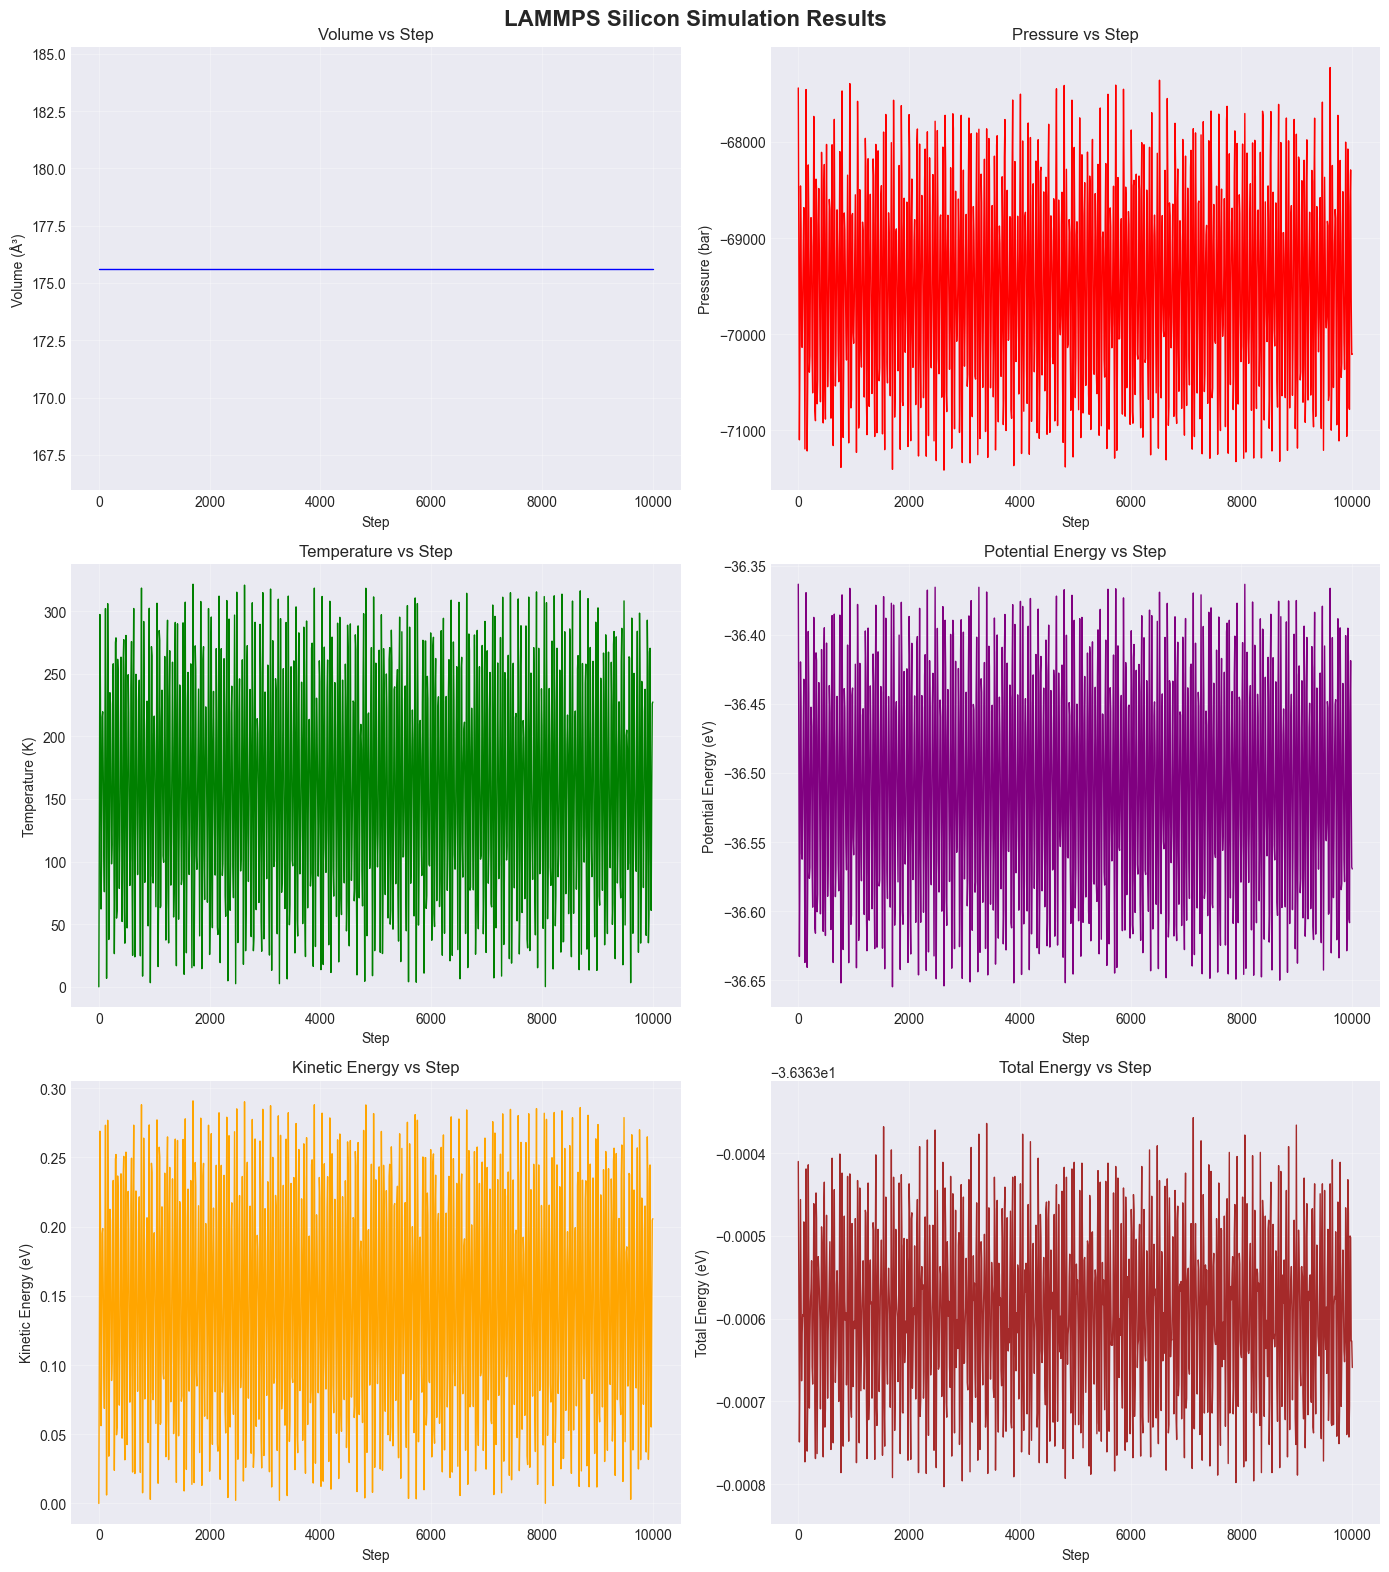

In [28]:
# Set up the plot style
plt.style.use('seaborn-v0_8-darkgrid')
fig, axes = plt.subplots(3, 2, figsize=(14, 16))
fig.suptitle('LAMMPS Silicon Simulation Results', fontsize=16, fontweight='bold')

# Plot Volume
axes[0, 0].plot(df['Step'], df['Volume'], color='blue', linewidth=1)
axes[0, 0].set_xlabel('Step')
axes[0, 0].set_ylabel('Volume (Å³)')
axes[0, 0].set_title('Volume vs Step')
axes[0, 0].grid(True, alpha=0.3)

# Plot Pressure
axes[0, 1].plot(df['Step'], df['Press'], color='red', linewidth=1)
axes[0, 1].set_xlabel('Step')
axes[0, 1].set_ylabel('Pressure (bar)')
axes[0, 1].set_title('Pressure vs Step')
axes[0, 1].grid(True, alpha=0.3)

# Plot Temperature
axes[1, 0].plot(df['Step'], df['Temp'], color='green', linewidth=1)
axes[1, 0].set_xlabel('Step')
axes[1, 0].set_ylabel('Temperature (K)')
axes[1, 0].set_title('Temperature vs Step')
axes[1, 0].grid(True, alpha=0.3)

# Plot Potential Energy
axes[1, 1].plot(df['Step'], df['PotEng'], color='purple', linewidth=1)
axes[1, 1].set_xlabel('Step')
axes[1, 1].set_ylabel('Potential Energy (eV)')
axes[1, 1].set_title('Potential Energy vs Step')
axes[1, 1].grid(True, alpha=0.3)

# Plot Kinetic Energy
axes[2, 0].plot(df['Step'], df['KinEng'], color='orange', linewidth=1)
axes[2, 0].set_xlabel('Step')
axes[2, 0].set_ylabel('Kinetic Energy (eV)')
axes[2, 0].set_title('Kinetic Energy vs Step')
axes[2, 0].grid(True, alpha=0.3)

# Plot Total Energy
axes[2, 1].plot(df['Step'], df['TotEng'], color='brown', linewidth=1)
axes[2, 1].set_xlabel('Step')
axes[2, 1].set_ylabel('Total Energy (eV)')
axes[2, 1].set_title('Total Energy vs Step')
axes[2, 1].grid(True, alpha=0.3)
y_min = df['TotEng'].min()
y_max = df['TotEng'].max()
y_range = y_max - y_min
axes[2, 1].set_ylim(y_min - 0.1*y_range, y_max + 0.1*y_range)
axes[2, 1].ticklabel_format(style='plain', axis='y')

plt.tight_layout()
plt.show()

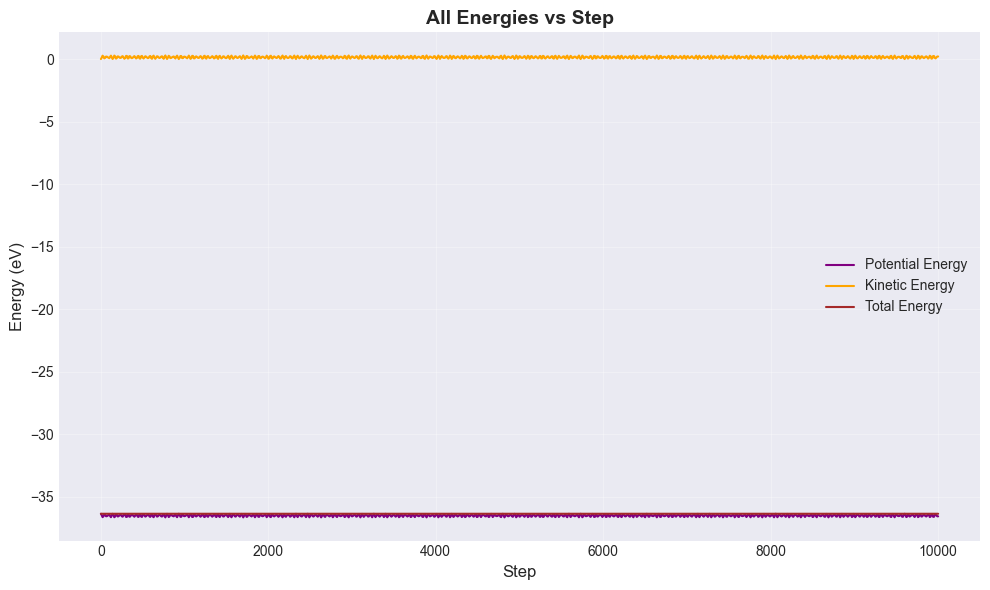

In [25]:
# Combined energy plot
plt.figure(figsize=(10, 6))
plt.plot(df['Step'], df['PotEng'], label='Potential Energy', color='purple', linewidth=1.5)
plt.plot(df['Step'], df['KinEng'], label='Kinetic Energy', color='orange', linewidth=1.5)
plt.plot(df['Step'], df['TotEng'], label='Total Energy', color='brown', linewidth=1.5)
plt.xlabel('Step', fontsize=12)
plt.ylabel('Energy (eV)', fontsize=12)
plt.title('All Energies vs Step', fontsize=14, fontweight='bold')
plt.legend(loc='best', fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [26]:
# Print statistics
print("\nSimulation Statistics:")
print("="*50)
print(f"Volume: {df['Volume'].mean():.3f} ± {df['Volume'].std():.3f} Å³")
print(f"Pressure: {df['Press'].mean():.1f} ± {df['Press'].std():.1f} bar")
print(f"Temperature: {df['Temp'].mean():.2f} ± {df['Temp'].std():.2f} K")
print(f"\nTotal System Energies:")
print(f"Potential Energy: {df['PotEng'].mean():.5f} ± {df['PotEng'].std():.5f} eV")
print(f"Kinetic Energy: {df['KinEng'].mean():.5f} ± {df['KinEng'].std():.5f} eV")
print(f"Total Energy: {df['TotEng'].mean():.5f} ± {df['TotEng'].std():.5f} eV")


Simulation Statistics:
Volume: 175.616 ± 0.000 Å³
Pressure: -69500.3 ± 1022.5 bar
Temperature: 161.30 ± 86.85 K

Total System Energies:
Potential Energy: -36.50954 ± 0.07868 eV
Kinetic Energy: 0.14595 ± 0.07858 eV
Total Energy: -36.36359 ± 0.00010 eV


## Mean and STD

In [29]:
# Calculate mean and standard deviation for all quantities
print("Mean and Standard Deviation for all quantities:")
print("="*60)
print(f"Step:              Mean = {df['Step'].mean():.2f},   Std = {df['Step'].std():.2f}")
print(f"Volume (Å³):       Mean = {df['Volume'].mean():.3f}, Std = {df['Volume'].std():.3f}")
print(f"Pressure (bar):    Mean = {df['Press'].mean():.2f},  Std = {df['Press'].std():.2f}")
print(f"Temperature (K):   Mean = {df['Temp'].mean():.2f},   Std = {df['Temp'].std():.2f}")
print(f"Potential Eng (eV): Mean = {df['PotEng'].mean():.6f}, Std = {df['PotEng'].std():.6f}")
print(f"Kinetic Eng (eV):  Mean = {df['KinEng'].mean():.6f}, Std = {df['KinEng'].std():.6f}")
print(f"Total Eng (eV):    Mean = {df['TotEng'].mean():.6f}, Std = {df['TotEng'].std():.6f}")

Mean and Standard Deviation for all quantities:
Step:              Mean = 5000.00,   Std = 2891.08
Volume (Å³):       Mean = 175.616, Std = 0.000
Pressure (bar):    Mean = -69500.27,  Std = 1022.45
Temperature (K):   Mean = 161.30,   Std = 86.85
Potential Eng (eV): Mean = -36.509544, Std = 0.078682
Kinetic Eng (eV):  Mean = 0.145949, Std = 0.078583
Total Eng (eV):    Mean = -36.363595, Std = 0.000102


## Aufgabe 7

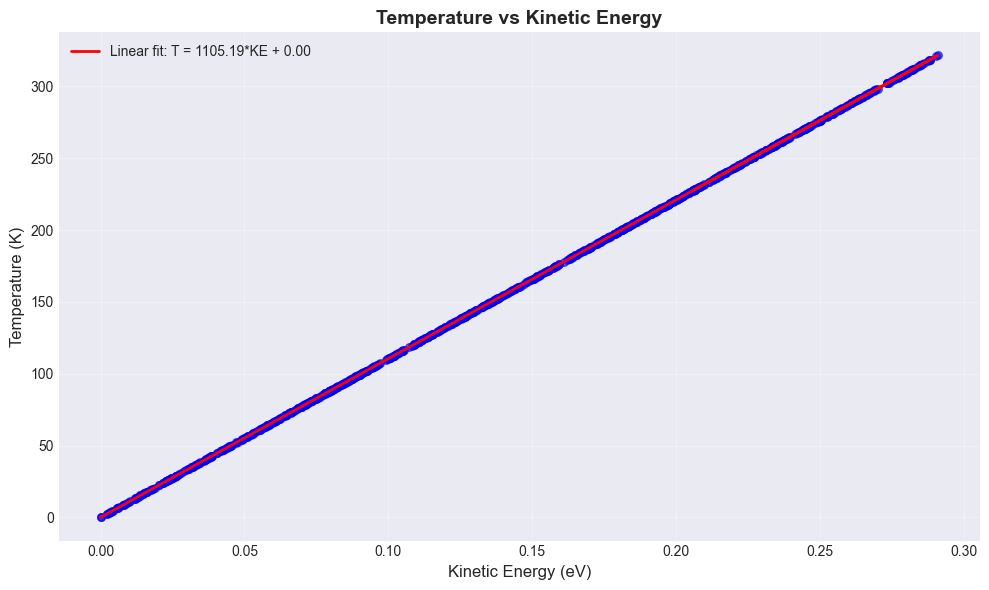

Linear relationship: Temperature = 1105.19 * Kinetic Energy + 0.00


In [32]:
# Plot Temperature as a function of Kinetic Energy
plt.figure(figsize=(10, 6))
plt.scatter(df["KinEng"], df["Temp"], alpha=0.6, s=30, color='blue')
plt.xlabel('Kinetic Energy (eV)', fontsize=12)
plt.ylabel('Temperature (K)', fontsize=12)
plt.title('Temperature vs Kinetic Energy', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

# Fit a linear regression line
coefficients = np.polyfit(df["KinEng"], df["Temp"], 1)
poly_line = np.poly1d(coefficients)
plt.plot(df["KinEng"], poly_line(df["KinEng"]), color='red', linewidth=2, label=f'Linear fit: T = {coefficients[0]:.2f}*KE + {coefficients[1]:.2f}')
plt.legend(fontsize=10)

plt.tight_layout()
plt.show()

print(f"Linear relationship: Temperature = {coefficients[0]:.2f} * Kinetic Energy + {coefficients[1]:.2f}")

In [34]:
# Verify the theoretical slope with proper units
# Equipartition theorem: KE = (f/2) * k_B * T
# Rearranging: T = (2 / (f * k_B)) * KE

n_atoms = 8
degrees_of_freedom = 3 * n_atoms  # 3 DOF per atom in 3D
k_B_eV_per_K = 8.617333e-5  # Boltzmann constant in eV/K

# Theoretical slope: T/KE = 2 / (f * k_B)
theoretical_slope = 2 / (degrees_of_freedom * k_B_eV_per_K)

print("Theoretical Analysis:")
print("="*60)
print(f"Number of atoms: {n_atoms}")
print(f"Degrees of freedom (3N): {degrees_of_freedom}")
print(f"Boltzmann constant: {k_B_eV_per_K} eV/K")
print(f"\nTheoretical slope (T/KE): {theoretical_slope:.2f} K/eV")
print(f"Fitted slope from data: {coefficients[0]:.2f} K/eV")
print(f"Difference: {abs(theoretical_slope - coefficients[0]):.2f} K/eV ({100*abs(theoretical_slope - coefficients[0])/theoretical_slope:.1f}%)")

# Check if LAMMPS removes COM motion (would give f = 21 instead of 24)
theoretical_slope_no_com = 2 / ((degrees_of_freedom - 3) * k_B_eV_per_K)
print(f"\nIf COM motion removed (f=21): {theoretical_slope_no_com:.2f} K/eV")
print(f"Difference from fit: {abs(theoretical_slope_no_com - coefficients[0]):.2f} K/eV ({100*abs(theoretical_slope_no_com - coefficients[0])/theoretical_slope_no_com:.1f}%)")

Theoretical Analysis:
Number of atoms: 8
Degrees of freedom (3N): 24
Boltzmann constant: 8.617333e-05 eV/K

Theoretical slope (T/KE): 967.04 K/eV
Fitted slope from data: 1105.19 K/eV
Difference: 138.15 K/eV (14.3%)

If COM motion removed (f=21): 1105.19 K/eV
Difference from fit: 0.00 K/eV (0.0%)
